DOC constituents - EDA, pre-processing - Age

### Age vs Claim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
from palettable.colorbrewer.diverging import *

In [2]:
sns.set(style='whitegrid', palette="Spectral_r")
# dual_colors = [ '#009fca','#00f8b9'] #'#005e79',

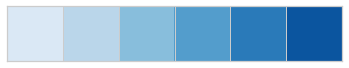

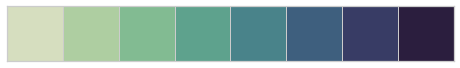

In [3]:
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
# dual_colors = [cpal[3],cpal[2]]
# sns.set_palette(cpal)
sns.palplot(cpal)
sns.palplot(cb_pal)

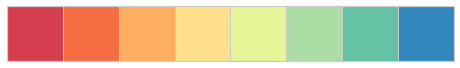

In [4]:
colors = Spectral_8.hex_colors
dual_colors = [colors[-1],colors[4]]
sns.palplot(colors)

In [5]:
# plt.style.use('seaborn-white')

In [6]:
df = pd.read_csv("../data/train.csv")
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [7]:
df.columns = df.columns.map(lambda x: x.lower())
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [8]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


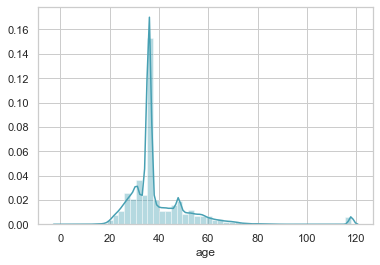

In [9]:
sns.distplot(df.age)

### Converting age to categorical

In [10]:
df["age_cut"] = pd.cut(df.age, [0,20,40,60,80,100,120])

In [11]:
df.age_cut.value_counts()

(20, 40]      37131
(40, 60]      11849
(60, 80]       2147
(100, 120]      737
(0, 20]         356
(80, 100]        88
Name: age_cut, dtype: int64

In [12]:
da = df.age_cut.value_counts().index
da[0]

Interval(20, 40, closed='right')

In [13]:
age_dict = {da[0]:"20-40",da[1]:"40-60",da[2]:"60-80",da[3]:"100-120",da[4]:"0-20",da[5]:"80-1000"}

In [14]:
age_dict

{Interval(20, 40, closed='right'): '20-40',
 Interval(40, 60, closed='right'): '40-60',
 Interval(60, 80, closed='right'): '60-80',
 Interval(100, 120, closed='right'): '100-120',
 Interval(0, 20, closed='right'): '0-20',
 Interval(80, 100, closed='right'): '80-1000'}

In [15]:
# df.age_cut = df.age_cut.map(age_dict)

In [16]:
df.age_cut.value_counts()

(20, 40]      37131
(40, 60]      11849
(60, 80]       2147
(100, 120]      737
(0, 20]         356
(80, 100]        88
Name: age_cut, dtype: int64

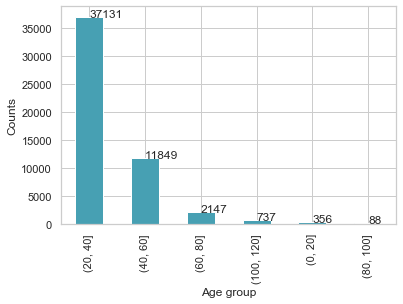

In [17]:
df.age_cut.value_counts().plot.bar()
for num, counts in enumerate(df.age_cut.value_counts()):
    plt.text(x=num, y=counts, s = counts)
plt.xlabel("Age group")
plt.ylabel("Counts")
plt.show()

### Majority travellers are in the age group 20-60.

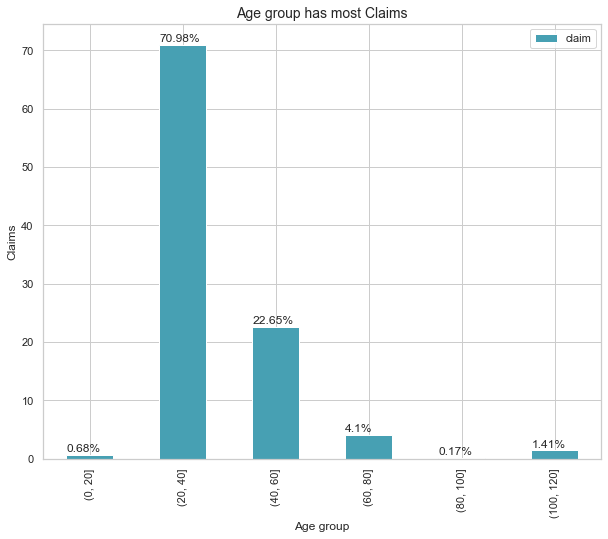

,claim
age_cut,
"(0, 20]",0.680558
"(20, 40]",70.982604
"(40, 60]",22.651501
"(60, 80]",4.104378
"(80, 100]",0.168228
"(100, 120]",1.408908


In [62]:
age_claims = (df.groupby(["age_cut"])[["claim"]].count()/len(df)*100)
ax = (df.groupby(["age_cut"])[["claim"]].count()/len(df)*100).plot(kind="bar",figsize=(10,8))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+0.5))
plt.xlabel("Age group")
plt.ylabel("Claims")
plt.title("Age group has most Claims",fontdict={'fontsize':14})
plt.show()
age_claims

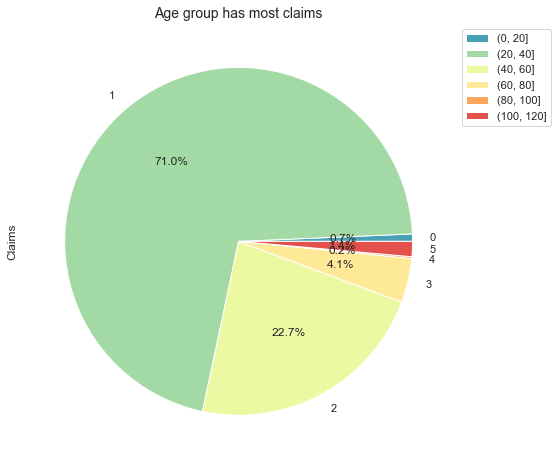

In [30]:
# df.groupby(["age_cut"])["claim"].value_counts().plot(kind='pie')
age_claims.reset_index().claim.plot(kind='pie',figsize=(8,8),autopct='%1.1f%%')
plt.legend(age_claims.index,bbox_to_anchor=(1,1))
plt.title("Age group has most claims",fontdict={'fontsize':14})
plt.ylabel('Claims')
plt.show()

### Majority Claims were made by people in age group 20-60, mainly 20-40.

In [20]:
age_claim_rate = df.groupby(["age_cut","claim"])[["claim"]].count()/df.groupby(["age_cut"])[["claim"]].count()*100
age_claim_rate

claim
age_cut    claim           
(0, 20]    0      88.483146
           1      11.516854
(20, 40]   0      82.922625
           1      17.077375
(40, 60]   0      83.475399
           1      16.524601
(60, 80]   0      85.933861
           1      14.066139
(80, 100]  0      89.772727
           1      10.227273
(100, 120] 0      90.637720
           1       9.362280

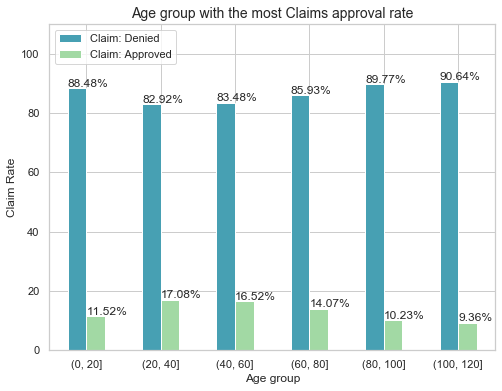

In [59]:
ax = age_claim_rate.unstack().plot(kind="bar", figsize=(8,6))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+0.5))
plt.xlabel("Age group")
plt.ylabel("Claim Rate")
plt.title("Age group with the most Claims approval rate",fontdict={'fontsize':14})
plt.legend(['Claim: Denied','Claim: Approved'],loc='upper left')
plt.ylim((0,110))
plt.xticks(rotation='horizontal')
plt.show()

In [51]:
age_claim_rate.columns = ['Claim Rate']
age_claim_rate_ri = age_claim_rate.reset_index().set_index('age_cut')

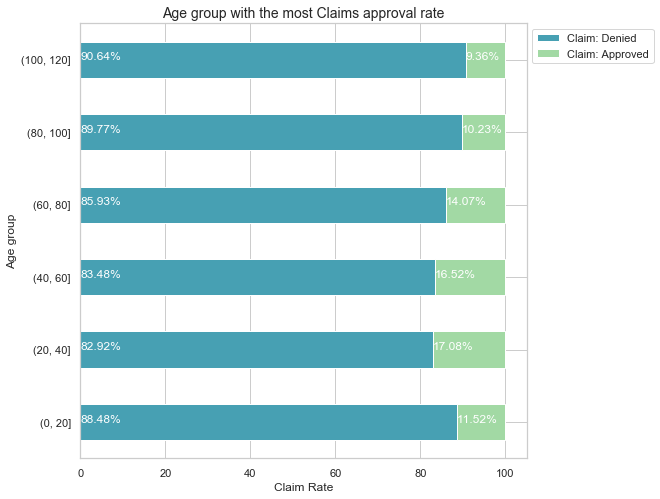

In [60]:
ax = age_claim_rate.unstack().plot(kind="barh", figsize=(8,8),stacked=True)
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(w,2))+"%", (x,y+h-0.25), color='white')
plt.ylabel("Age group")
plt.xlabel("Claim Rate")
plt.title("Age group with the most Claims approval rate",fontdict={'fontsize':14})
plt.legend(['Claim: Denied','Claim: Approved'],bbox_to_anchor=(1,1))
# plt.xlim((0,115))
plt.show()

In [23]:
df.groupby(["age_cut","agency_type"])[["agency_type"]].count()/df.groupby(["age_cut"])[["agency_type"]].count()*100

agency_type
age_cut    agency_type               
(0, 20]    Airlines         51.123596
           Travel Agency    48.876404
(20, 40]   Airlines         25.410035
           Travel Agency    74.589965
(40, 60]   Airlines         49.978901
           Travel Agency    50.021099
(60, 80]   Airlines         50.489054
           Travel Agency    49.510946
(80, 100]  Airlines         52.272727
           Travel Agency    47.727273
(100, 120] Airlines         87.516961
           Travel Agency    12.483039